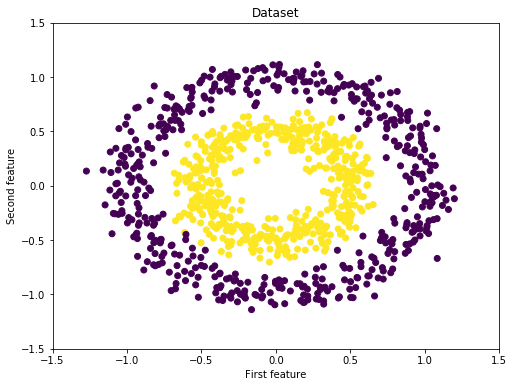

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.clf()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

def evaluate_binary_clf_proba(y_actual, y_prob):
    plt.clf()
    precisions, recalls, thresholds = precision_recall_curve(y_actual, y_prob)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    plt.plot(fpr, tpr, marker='.')
    auc = roc_auc_score(y_actual, y_prob)
    print('auc: ', auc)
    plt.show()

def evaluate_binary_clf_bin(y_actual, y_bin):
    plt.clf()
    print(confusion_matrix(y_actual, y_bin))
    print('precision: ', precision_score(y_actual, y_bin))
    print('recall: ', recall_score(y_actual, y_bin))
    print('f1-score: ', f1_score(y_actual, y_bin))

X, y_true = make_circles(n_samples=1000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

X_train_s = X_train[:4]
y_train_s = y_train[:4]

In [213]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        # Initialize weight matrices and bias vectors
        self.W0 = np.random.randn(n_inputs, n_hidden)
        self.b0 = np.zeros((1, n_hidden))
        self.W1 = np.random.randn(n_hidden, n_outputs)
        self.b1 = np.zeros((1, n_outputs))

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def forward_pass(self, X):
        # Compute activations and outputs of hidden units: H = sigmoid(W_0*X + b0)
        H1_i = np.dot(X, self.W0) + self.b0
        H1_o = self.sigmoid(H1_i)
        # Compute activations and outputs of output units: Y = sigmoid(W_1*H + b1)
        Y_i = np.dot(H1_o, self.W1) + self.b1
        Y_o = self.sigmoid(Y_i)

        outputs = {
                "H1_o": H1_o,
                "Y_o": Y_o,
                }

        return outputs

    def cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost

    def backward_pass(self, X, Y, n_samples, outputs):
        Y_o = outputs['Y_o']
        H1_o = outputs['H1_o']
        
        # e2 = Y_o - Y
        # e1 = W1*e2*H1*(1-H1)        -----    VERY IMPORTANT: *h2*(1-h2) is SCALING
        # dJ/dw1 = H1*e2
        # dJ/dw0 = X*e1
        
        e2 = Y_o - Y
        dW1 = (1 / n_samples) * np.dot(H1_o.T, e2)
        db1 = (1 / n_samples) * np.sum(e2)
# -----VERY IMPORTANT: *H1*(1-H1) is SCALING NOT PRODUCTION: *H1*(1-H1) √ | .dot(H1.dot(1-H1)) X
        e1 = (np.dot(e2, self.W1.T)) * H1_o * (1 - H1_o)

        dW0 = (1 / n_samples) * np.dot(X.T, e1)
        db0 = (1 / n_samples) * np.sum(e1)

        gradients = {
                "dW1": dW1,
                "db1": db1,
                "dW0": dW0,
                "db0": db0,
                }

        return gradients

    def update_weights(self, gradients, eta):
        self.W1 = self.W1 - eta * gradients["dW1"]
        self.b1 = self.b1 - eta * gradients["db1"]
        
        self.W0 = self.W0 - eta * gradients["dW0"]
        self.b0 = self.b0 - eta * gradients["db0"]

    def train(self, X, y, n_iters=500, eta=0.3):
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs['Y_o'], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')
            self.update_weights(gradients, eta)


    def predict(self, X):
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["Y_o"]]
        return np.array(y_pred)[:, np.newaxis]
    def predict_proba(self, X):
        outputs = self.forward_pass(X)
        return outputs['Y_o']

Cost at iteration 0: 0.7997
Cost at iteration 100: 0.6758
Cost at iteration 200: 0.6406
Cost at iteration 300: 0.5792
Cost at iteration 400: 0.4837
Cost at iteration 500: 0.3883
Cost at iteration 600: 0.3151
Cost at iteration 700: 0.2637
Cost at iteration 800: 0.2277
Cost at iteration 900: 0.2019
Cost at iteration 1000: 0.1829
Cost at iteration 1100: 0.1684
Cost at iteration 1200: 0.1569
Cost at iteration 1300: 0.1475
Cost at iteration 1400: 0.1396
Cost at iteration 1500: 0.1327
Cost at iteration 1600: 0.1265
Cost at iteration 1700: 0.1206
Cost at iteration 1800: 0.1149
Cost at iteration 1900: 0.1092


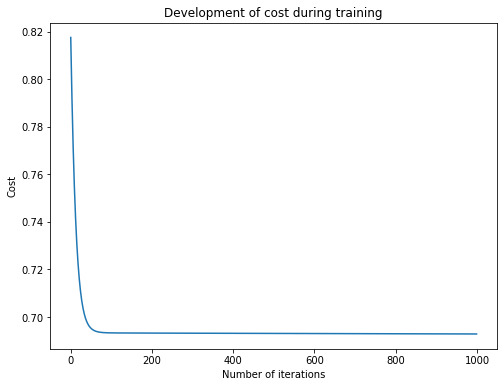

[[120   1]
 [  0 129]]
precision:  0.9923076923076923
recall:  1.0
f1-score:  0.9961389961389961


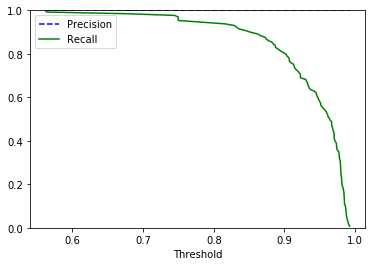

auc:  1.0


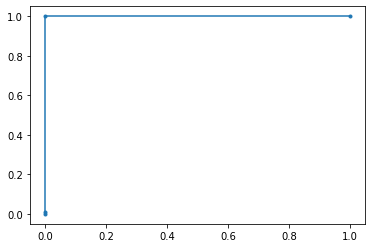

Classification accuracy on test set: 99.6 %


Text(0.5, 1.0, 'Decision boundary')

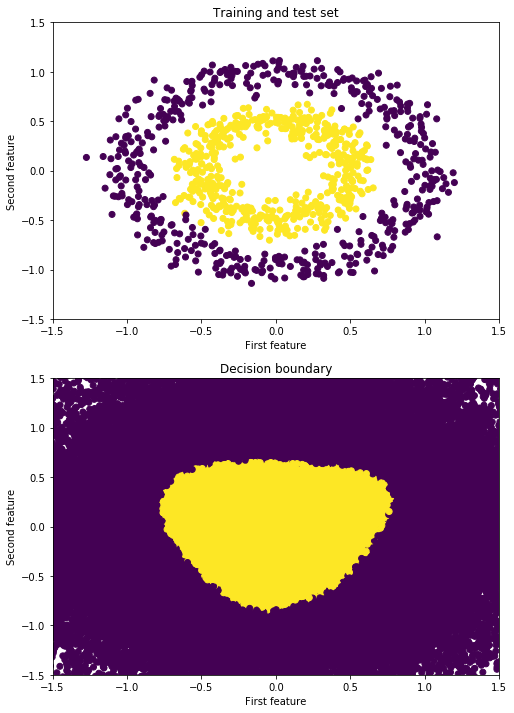

In [214]:
n_iters = 1000
learning_rate = 0.1
nn = NeuralNet(n_inputs=2, n_hidden=6, n_outputs=1)
# nn = NeuralNetwork()
# w1, w2, costs = nn.train_gradient_descent(X_train, y_train, learning_rate, n_iters)
nn.train(X_train, y_train, n_iters=2000, eta=0.7)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

# y_p_train = nn.predict(X_train)
y_p_test = nn.predict(X_test)

# evaluate_binary_clf_bin(y_train, y_p_train)
evaluate_binary_clf_bin(y_test, y_p_test)

# y_proba_train = nn.predict_proba(X_train)
y_proba_test = nn.predict_proba(X_test)

# evaluate_binary_clf_proba(y_train, y_proba_train)
evaluate_binary_clf_proba(y_test, y_proba_test)
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")

In [ ]:
### Combining W & b: somewhere buggy
class NeuralNetwork:
    
    def __init__(self):
        pass

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def append_bias(self, X):
        n_samples, n_features = X.shape
        ones = np.ones(shape=(n_samples, 1))
        X1 = np.concatenate((X, ones),axis = 1)
        return X1
    
    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        X1 = self.append_bias(X)
        h_o, y_o = self.forward_pass(X1)
        y_bin = [1 if elem >= 0.5 else 0 for elem in y_o]

        return np.array(y_bin)[:, np.newaxis]
    
    def predict_proba(self, X):
        X1 = self.append_bias(X)
        h_o, y_o = self.forward_pass(X1)
        print(h_o)
        return y_o
    
    def forward_pass(self, X1):
        
        """
        Propagates the given input X forward through the net.
        """
        # Compute activations and outputs of hidden units
        
        h_i = np.dot(X1, self.w1)
        h_o = self.append_bias(self.sigmoid(h_i))
#         h_o = self.sigmoid(h_i)

        y_i = np.dot(h_o, self.w2)
        y_o = self.sigmoid(y_i)
        self.debug = False
        if self.debug:
            print(X1.shape)
            print(self.w1.shape)
            print(h_i.shape)
            print(h_o.shape)
            print(self.w2.shape)
            print(y_i.shape)
            print(y_o.shape)
        
        return h_o, y_o
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        # Step 0: Initialize the parameters
        # 3 layers: w1, w2
        n_samples, n_features = X.shape
        X1 = self.append_bias(X)   

        nodes_num_layer1 = 6
        
        self.debug = False
        self.w1 = np.random.rand(n_features + 1, nodes_num_layer1)
#         print('W1', w1.shape)
        
        # layer 2 parameter number can be configed 
        self.w2 = np.random.rand(nodes_num_layer1 + 1, 1)
    
        costs = []
        # Step 1: Loop until iterate enoughf
    
        for k in range(n_iters):
            # forward predict impls
            h_o, y_o = self.forward_pass(X1)
            
            # e3 = y - yr
            # e2 = w2*e3*h2*(1-h2)        -----    VERY IMPORTANT: *h2*(1-h2) is SCALING
            # dJ/dw2 = h2*e3
            # dJ/dw1 = h1*e2
            
            e3 = y_o - y
#             e2 = np.dot(np.dot(e3, self.w2.T), np.dot(h_o.T, 1 - h_o))
#             m, n = h_o.shape
#             h_o_S = h_o[:,:n]
            e2 = np.dot(e3, self.w2.T) * h_o * (1 - h_o)
        
#             print(h_o)
#             print(1-h_o)
#             print(np.dot(h_o.T, 1-h_o))
            # Step 2: Compute cost over training set
            cost = -(1 / n_samples) * np.sum(y * np.log(y_o) + (1 - y) * np.log(1 - y_o))
            costs.append(cost)
            if k % (n_iters / 10) == 0:
                print(f"Cost at iteration {k}: {cost}")
            # Step 3: Compute the gradients
            dJ_dw2 = 1.0 / n_samples * np.dot(h_o.T, e3)

            m, n = w1.shape
            dJ_dw1 = 1.0 / n_samples * np.dot(X1.T, e2[:,:n])

#             gradient = get_gradient()
            # Step 4: Update the parameters

            if self.debug:
                print(e3.shape)
                print(self.w2.shape)
                print(h_o.shape)
                print((1-h_o).shape)
                print(e2.shape)
                print(dJ_dw2.shape)
                print(dJ_dw1.shape)
                
            self.w2 = self.w2 - learning_rate * dJ_dw2
            self.w1 = self.w1 - learning_rate * dJ_dw1
        return self.w1, self.w2, costs